In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import datetime
import seaborn as sns
%matplotlib inline

In [3]:
sp = pd.read_csv('sha-pek.csv')

### Shanghai to Beijing DataSet

#### Cleaning Data Set

In [4]:
sp.drop(['ID','flightNumber', 'craftTypeCode', 'depAirport', 'arrAirport', 'arrivalDate', 'priceClass', 'rate'], axis = 1, inplace = True)

###### Handling Transfer Airport

In [5]:
sp.traAirport.fillna(0, inplace = True)
sp.traAirport.replace('LYA', 1, inplace =True)

###### Converting from Chinese Yuan to USD

In [6]:
sp['price'] = [x * .14 for x in sp.price]

###### Getting rid of -1 datedifference (makes no sense)

In [7]:
sp.dateDifference = np.where(sp.dateDifference == -1, np.nan, sp.dateDifference)
sp.dropna(inplace=True)

#### Feature Engineering

In [8]:
sp['DD'] = [x[:10] for x in sp.departureDate]

In [9]:
sp['Month'] = [x[5:7] for x in sp.departureDate]

In [10]:
import datetime 
import calendar 
  
def findDay(date): 
    born = datetime.datetime.strptime(date, '%Y-%m-%d').weekday() 
    return (calendar.day_name[born]) 

In [11]:
sp['DOW'] = [findDay(x) for x in sp.DD]

In [12]:
sp['TOD']= [x[11:16] for x in sp.departureDate]
sp['TOD'] = pd.to_datetime(sp['TOD'])
sp['TOD'] = [time.time() for time in sp['TOD']]
sp['TODD']= np.where(((sp['TOD']> datetime.time(6,0)) & (sp['TOD']<= datetime.time(12,0))), 'M', np.nan)
sp['TODD'] = np.where(((sp['TOD']> datetime.time(12,0)) & (sp['TOD']<= datetime.time(18,0))), 'A', sp['TODD'])
sp['TODD'] = np.where(((sp['TOD']> datetime.time(18,0)) & (sp['TOD']<= datetime.time(23,0))), 'N', sp['TODD'])

In [13]:
sp['PD'] = [x[:10] for x in sp.createDate]

In [14]:
sp['MOPD'] = [x[5:7] for x in sp.createDate]

In [15]:
sp['DOPD'] = [findDay(x) for x in sp.PD]

In [16]:
sp['TOPD']= [x[11:16] for x in sp.createDate]
sp['TOPD'] = pd.to_datetime(sp['TOPD'])
sp['TOPD'] = [time.time() for time in sp['TOPD']]
sp['TOPD_L']= np.where(((sp['TOPD']>= datetime.time(0,0)) & (sp['TOPD']< datetime.time(6,0))), 'EM', np.nan)
sp['TOPD_L']= np.where(((sp['TOPD']>= datetime.time(6,0)) & (sp['TOPD']<= datetime.time(12,0))), 'M', sp['TOPD_L'])
sp['TOPD_L'] = np.where(((sp['TOPD']> datetime.time(12,0)) & (sp['TOPD']<= datetime.time(18,0))), 'A', sp['TOPD_L'])
sp['TOPD_L'] = np.where(((sp['TOPD']> datetime.time(18,0)) & (sp['TOPD']<= datetime.time(23,59))), 'N', sp['TOPD_L'])

In [17]:
sp.TOPD_L.unique()

array(['EM', 'M', 'N', 'A'], dtype=object)

#### Cleaning part 2

In [18]:
sp.drop(['departureDate', 'createDate'], axis = 1, inplace = True)

#### EDA with visualizations

In [19]:
sp.head()

,traAirport,cabinClass,price,dateDifference,DD,Month,DOW,TOD,TODD,PD,MOPD,DOPD,TOPD,TOPD_L
19,0,C,218.4,0.0,2019-05-01,05,Wednesday,07:00:00,M,2019-05-01,05,Wednesday,02:07:00,EM
20,0,C,792.4,0.0,2019-05-01,05,Wednesday,07:00:00,M,2019-05-01,05,Wednesday,02:07:00,EM
21,0,C,291.2,0.0,2019-05-01,05,Wednesday,07:55:00,M,2019-05-01,05,Wednesday,02:07:00,EM
22,0,C,792.4,0.0,2019-05-01,05,Wednesday,07:55:00,M,2019-05-01,05,Wednesday,02:07:00,EM
23,0,C,218.4,0.0,2019-05-01,05,Wednesday,08:00:00,M,2019-05-01,05,Wednesday,02:07:00,EM


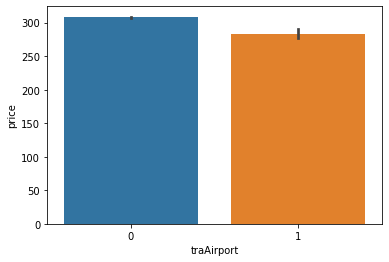

In [20]:
sns.barplot(x = sp['traAirport'], y = sp['price'], data = sp)

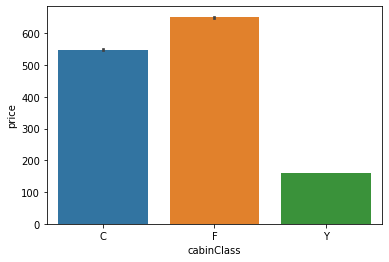

In [21]:
sns.barplot(x = sp['cabinClass'], y = sp['price'], data = sp)

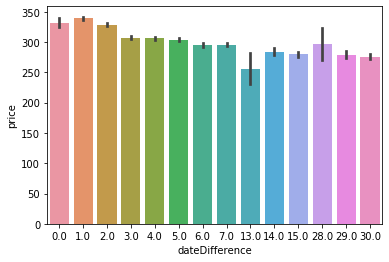

In [22]:
sns.barplot(x = sp['dateDifference'], y = sp['price'], data = sp)

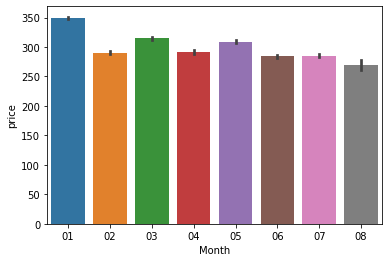

In [23]:
sns.barplot(x = sp['Month'], y = sp['price'], data = sp)

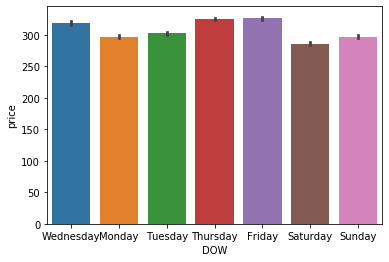

In [24]:
sns.barplot(x = sp['DOW'], y = sp['price'], data = sp)

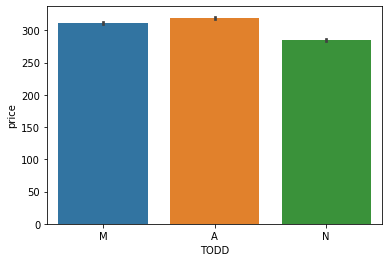

In [25]:
sns.barplot(x = sp['TODD'], y = sp['price'], data = sp)

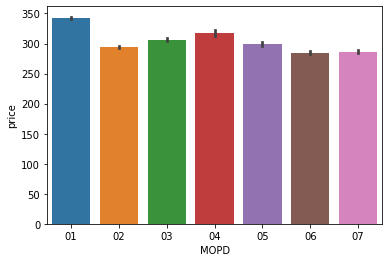

In [26]:
sns.barplot(x = sp['MOPD'], y = sp['price'], data = sp)

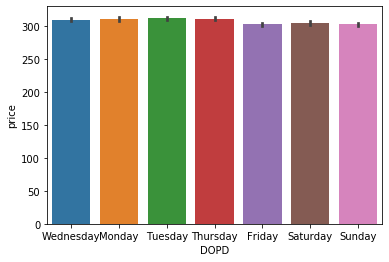

In [27]:
sns.barplot(x = sp['DOPD'], y = sp['price'], data = sp)

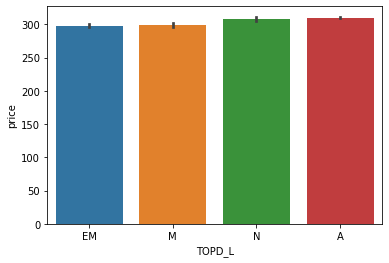

In [28]:
sns.barplot(x = sp['TOPD_L'], y = sp['price'], data = sp)

### Beijing to Shanghai DataSet

In [29]:
ps = pd.read_csv('pek-sha.csv')

#### Cleaning Data Set

In [30]:
ps.drop(['ID','flightNumber', 'craftTypeCode', 'depAirport', 'arrAirport', 'arrivalDate', 'priceClass', 'rate'], axis = 1, inplace = True)

###### Handling Missing Values Transfer Airport

In [31]:
ps.traAirport.fillna(0, inplace = True)
ps.traAirport.replace('LYA', 1, inplace =True)

###### Converting from Chinese Yuan to USD

In [32]:
ps['price'] = [x * .14 for x in ps.price]

#### Feature Engineering

In [33]:
ps['DD'] = [x[:10] for x in ps.departureDate]
ps['Month'] = [x[5:7] for x in ps.departureDate]

In [34]:
ps['DOW'] = [findDay(x) for x in ps.DD]

In [35]:
ps['TOD']= [x[11:16] for x in ps.departureDate]
ps['TOD'] = pd.to_datetime(ps['TOD'])
ps['TOD'] = [time.time() for time in ps['TOD']]
ps['TODD']= np.where(((ps['TOD']> datetime.time(6,0)) & (ps['TOD']<= datetime.time(12,0))), 'M', np.nan)
ps['TODD'] = np.where(((ps['TOD']> datetime.time(12,0)) & (ps['TOD']<= datetime.time(18,0))), 'A', ps['TODD'])
ps['TODD'] = np.where(((ps['TOD']> datetime.time(18,0)) & (ps['TOD']<= datetime.time(23,0))), 'N', ps['TODD'])

In [36]:
ps['PD'] = [x[:10] for x in ps.createDate]
ps['MOPD'] = [x[5:7] for x in ps.createDate]
ps['DOPD'] = [findDay(x) for x in ps.PD]

In [37]:
ps['TOPD']= [x[11:16] for x in ps.createDate]
ps['TOPD'] = pd.to_datetime(ps['TOPD'])
ps['TOPD'] = [time.time() for time in ps['TOPD']]
ps['TOPD_L']= np.where(((ps['TOPD']>= datetime.time(0,0)) & (ps['TOPD']< datetime.time(6,0))), 'EM', np.nan)
ps['TOPD_L']= np.where(((ps['TOPD']>= datetime.time(6,0)) & (ps['TOPD']<= datetime.time(12,0))), 'M', ps['TOPD_L'])
ps['TOPD_L'] = np.where(((ps['TOPD']> datetime.time(12,0)) & (ps['TOPD']<= datetime.time(18,0))), 'A', ps['TOPD_L'])
ps['TOPD_L'] = np.where(((ps['TOPD']> datetime.time(18,0)) & (ps['TOPD']<= datetime.time(23,59))), 'N', ps['TOPD_L'])

#### Cleaning part 2

In [38]:
ps.drop(['departureDate', 'createDate'], axis = 1, inplace = True)

#### EDA with visualizations

In [39]:
ps.head()

,traAirport,cabinClass,price,dateDifference,DD,Month,DOW,TOD,TODD,PD,MOPD,DOPD,TOPD,TOPD_L
0,0,C,260.4,1,2019-01-04,01,Friday,06:35:00,M,2019-01-03,01,Thursday,14:26:00,A
1,0,C,229.6,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,01,Thursday,14:26:00,A
2,0,C,750.4,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,01,Thursday,14:26:00,A
3,0,C,228.9,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,01,Thursday,14:26:00,A
4,0,C,229.6,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,01,Thursday,14:26:00,A


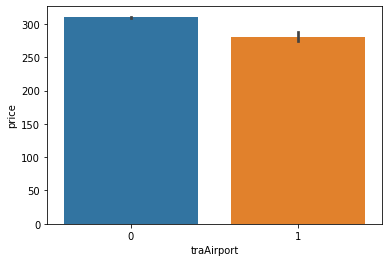

In [40]:
sns.barplot(x = ps['traAirport'], y = ps['price'], data = ps)

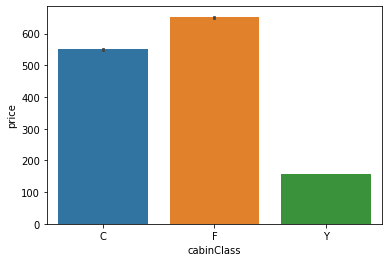

In [41]:
sns.barplot(x = ps['cabinClass'], y = ps['price'], data = ps)

In [100]:
ps.groupby('cabinClass').price.mean()

cabinClass
C    551.004677
F    650.947357
Y    157.715998
Name: price, dtype: float64

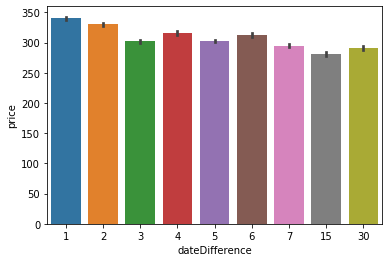

In [42]:
sns.barplot(x = ps['dateDifference'], y = ps['price'], data = ps)

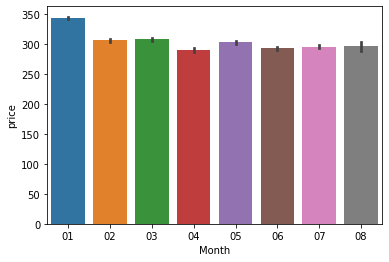

In [43]:
sns.barplot(x = ps['Month'], y = ps['price'], data = ps)

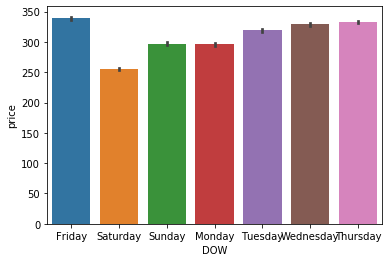

In [44]:
sns.barplot(x = ps['DOW'], y = ps['price'], data = ps)

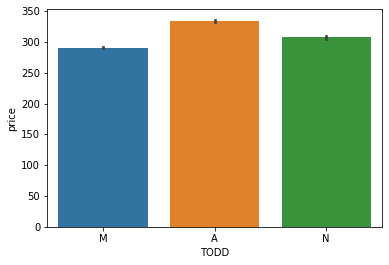

In [45]:
sns.barplot(x = ps['TODD'], y = ps['price'], data = ps)

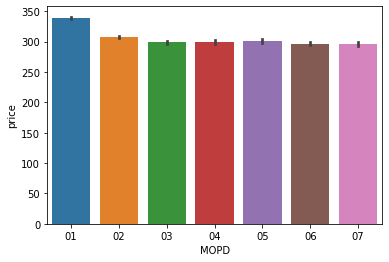

In [46]:
sns.barplot(x = ps['MOPD'], y = ps['price'], data = ps)

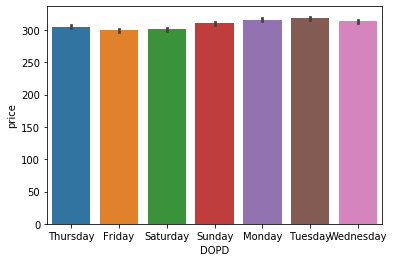

In [47]:
sns.barplot(x = ps['DOPD'], y = ps['price'], data = ps)

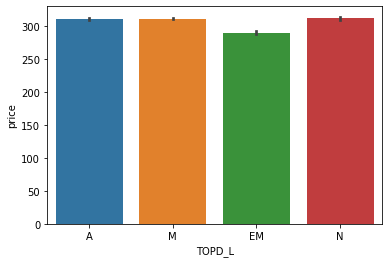

In [48]:
sns.barplot(x = ps['TOPD_L'], y = ps['price'], data = ps)

#### Feature Engineering Part 2

In [49]:
ps.groupby('TOPD_L').price.mean()

TOPD_L
A     311.293480
EM    290.747624
M     311.959241
N     312.197083
Name: price, dtype: float64

In [50]:
sp.groupby('TOPD_L').price.mean()

TOPD_L
A     310.138902
EM    298.040807
M     298.576436
N     307.684248
Name: price, dtype: float64

In [51]:
dummies1 = pd.get_dummies(ps['TOPD_L'], prefix = 'TOPD_L', drop_first = True)

In [52]:
dummies1

,TOPD_L_EM,TOPD_L_M,TOPD_L_N
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
300331,1,0,0
300332,1,0,0
300333,1,0,0
300334,1,0,0


In [53]:
dummies1['price'] = ps['price']

In [54]:
model = ols(formula = 'price~TOPD_L_EM+TOPD_L_M+TOPD_L_N', data = dummies1).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     77.66
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           3.27e-50
Time:                        18:49:32   Log-Likelihood:            -2.0791e+06
No. Observations:              300336   AIC:                         4.158e+06
Df Residuals:                  300332   BIC:                         4.158e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    311.2935      1.115    279.167      0.000     309.108     313.479
TOPD_L_EM    -20.5459      1.713    -11.998      0.000     -23.902     -17.189
TOPD_L_M       0.6658      1.254      0.531      0.596      -1.792       3.124
TOPD_L_N       0.9036      1.752      0.516      0.606      -2.531       4.338
==============================================================================
Omnibus:                    44310.387   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66282.702
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                       2.747   Cond. No.                         6.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
dummies2 = pd.get_dummies(sp['TOPD_L'], prefix = 'TOPD_L', drop_first = True)

In [57]:
dummies2['price'] = sp['price']

In [58]:
model = ols(formula = 'price~TOPD_L_EM+TOPD_L_M+TOPD_L_N', data = dummies2).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     32.83
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           3.29e-21
Time:                        18:49:33   Log-Likelihood:            -1.8564e+06
No. Observations:              268524   AIC:                         3.713e+06
Df Residuals:                  268520   BIC:                         3.713e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    310.1389      0.577    537.050      0.000     309.007     311.271
TOPD_L_EM    -12.0981      1.426     -8.485      0.000     -14.893      -9.304
TOPD_L_M     -11.5625      1.877     -6.161      0.000     -15.241      -7.884
TOPD_L_N      -2.4547      1.383     -1.774      0.076      -5.166       0.257
==============================================================================
Omnibus:                    41258.839   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63771.293
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       2.854   Cond. No.                         4.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Feature Engineered new column for each data set to account for time of day ticket purchased

In [60]:
ps['TOPDL_1']= np.where(ps['TOPD_L']== 'EM', 1, 0)

In [61]:
sp['TOPDL_1']= np.where(((sp['TOPD_L']== 'EM') | (sp['TOPD_L']== 'M')), 1, 0)

In [62]:
dummiesa = pd.get_dummies(ps['MOPD'], prefix = 'MOPD', drop_first = True)

In [63]:
dummiesa['price'] = ps['price']

In [64]:
dummiesa

,MOPD_02,MOPD_03,MOPD_04,MOPD_05,MOPD_06,MOPD_07,price
0,0,0,0,0,0,0,260.4
1,0,0,0,0,0,0,229.6
2,0,0,0,0,0,0,750.4
3,0,0,0,0,0,0,228.9
4,0,0,0,0,0,0,229.6
...,...,...,...,...,...,...,...
300331,0,0,0,0,0,1,116.2
300332,0,0,0,0,0,1,123.2
300333,0,0,0,0,0,1,128.8
300334,0,0,0,0,0,1,113.4


In [65]:
model = ols(formula = 'price~MOPD_02+MOPD_03+MOPD_04+MOPD_05+MOPD_06+MOPD_07', data = dummiesa).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     228.2
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          4.72e-292
Time:                        18:49:33   Log-Likelihood:            -2.0786e+06
No. Observations:              300336   AIC:                         4.157e+06
Df Residuals:                  300329   BIC:                         4.157e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    338.9325      0.937    361.817      0.000     337.097     340.769
MOPD_02      -31.5356      1.343    -23.485      0.000     -34.167     -28.904
MOPD_03      -40.4285      1.418    -28.503      0.000     -43.208     -37.648
MOPD_04      -39.8108      1.983    -20.078      0.000     -43.697     -35.924
MOPD_05      -37.9478      1.769    -21.451      0.000     -41.415     -34.481
MOPD_06      -42.4727      1.517    -28.006      0.000     -45.445     -39.500
MOPD_07      -43.5459      1.803    -24.154      0.000     -47.079     -40.012
==============================================================================
Omnibus:                    43885.360   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65594.201
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                       2.763   Cond. No.                         6.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
dummiesa.drop('price', axis =1, inplace = True)

In [68]:
ps.groupby('MOPD').price.mean()

MOPD
01    338.932545
02    307.396975
03    298.504052
04    299.121786
05    300.984781
06    296.459888
07    295.386612
Name: price, dtype: float64

In [69]:
ps.head()

,traAirport,cabinClass,price,dateDifference,DD,Month,DOW,TOD,TODD,PD,MOPD,DOPD,TOPD,TOPD_L,TOPDL_1
0,0,C,260.4,1,2019-01-04,01,Friday,06:35:00,M,2019-01-03,01,Thursday,14:26:00,A,0
1,0,C,229.6,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,01,Thursday,14:26:00,A,0
2,0,C,750.4,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,01,Thursday,14:26:00,A,0
3,0,C,228.9,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,01,Thursday,14:26:00,A,0
4,0,C,229.6,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,01,Thursday,14:26:00,A,0


In [70]:
ps = pd.concat([ps,dummiesa], axis =1)

In [71]:
ps.head()

,traAirport,cabinClass,price,dateDifference,DD,Month,DOW,TOD,TODD,PD,...,DOPD,TOPD,TOPD_L,TOPDL_1,MOPD_02,MOPD_03,MOPD_04,MOPD_05,MOPD_06,MOPD_07
0,0,C,260.4,1,2019-01-04,01,Friday,06:35:00,M,2019-01-03,...,Thursday,14:26:00,A,0,0,0,0,0,0,0
1,0,C,229.6,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,...,Thursday,14:26:00,A,0,0,0,0,0,0,0
2,0,C,750.4,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,...,Thursday,14:26:00,A,0,0,0,0,0,0,0
3,0,C,228.9,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,...,Thursday,14:26:00,A,0,0,0,0,0,0,0
4,0,C,229.6,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,...,Thursday,14:26:00,A,0,0,0,0,0,0,0


In [72]:

dummiesMOPD = pd.get_dummies(sp['MOPD'], prefix = 'MOPD', drop_first = True)
sp = pd.concat([sp,dummiesMOPD], axis =1)
sp.head()

,traAirport,cabinClass,price,dateDifference,DD,Month,DOW,TOD,TODD,PD,...,DOPD,TOPD,TOPD_L,TOPDL_1,MOPD_02,MOPD_03,MOPD_04,MOPD_05,MOPD_06,MOPD_07
19,0,C,218.4,0.0,2019-05-01,05,Wednesday,07:00:00,M,2019-05-01,...,Wednesday,02:07:00,EM,1,0,0,0,1,0,0
20,0,C,792.4,0.0,2019-05-01,05,Wednesday,07:00:00,M,2019-05-01,...,Wednesday,02:07:00,EM,1,0,0,0,1,0,0
21,0,C,291.2,0.0,2019-05-01,05,Wednesday,07:55:00,M,2019-05-01,...,Wednesday,02:07:00,EM,1,0,0,0,1,0,0
22,0,C,792.4,0.0,2019-05-01,05,Wednesday,07:55:00,M,2019-05-01,...,Wednesday,02:07:00,EM,1,0,0,0,1,0,0
23,0,C,218.4,0.0,2019-05-01,05,Wednesday,08:00:00,M,2019-05-01,...,Wednesday,02:07:00,EM,1,0,0,0,1,0,0


In [73]:
dummiesb = pd.get_dummies(ps['dateDifference'], prefix = 'dateDifference', drop_first =True)

In [74]:
ps.columns

Index(['traAirport', 'cabinClass', 'price', 'dateDifference', 'DD', 'Month',
       'DOW', 'TOD', 'TODD', 'PD', 'MOPD', 'DOPD', 'TOPD', 'TOPD_L', 'TOPDL_1',
       'MOPD_02', 'MOPD_03', 'MOPD_04', 'MOPD_05', 'MOPD_06', 'MOPD_07'],
      dtype='object')

In [75]:
ps = pd.concat([ps,dummiesb], axis =1)

In [76]:
ps.columns

Index(['traAirport', 'cabinClass', 'price', 'dateDifference', 'DD', 'Month',
       'DOW', 'TOD', 'TODD', 'PD', 'MOPD', 'DOPD', 'TOPD', 'TOPD_L', 'TOPDL_1',
       'MOPD_02', 'MOPD_03', 'MOPD_04', 'MOPD_05', 'MOPD_06', 'MOPD_07',
       'dateDifference_2', 'dateDifference_3', 'dateDifference_4',
       'dateDifference_5', 'dateDifference_6', 'dateDifference_7',
       'dateDifference_15', 'dateDifference_30'],
      dtype='object')

In [77]:
ps.head()

,traAirport,cabinClass,price,dateDifference,DD,Month,DOW,TOD,TODD,PD,...,MOPD_06,MOPD_07,dateDifference_2,dateDifference_3,dateDifference_4,dateDifference_5,dateDifference_6,dateDifference_7,dateDifference_15,dateDifference_30
0,0,C,260.4,1,2019-01-04,01,Friday,06:35:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,0,0
1,0,C,229.6,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,0,0
2,0,C,750.4,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,0,0
3,0,C,228.9,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,0,0
4,0,C,229.6,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,0,0


In [78]:
sp['dateDifference'] = sp['dateDifference'].astype(int)


dummiesdate_Diff = pd.get_dummies(sp['dateDifference'], prefix = 'dateDifference', drop_first = True)

sp = pd.concat([sp,dummiesdate_Diff], axis = 1)


In [79]:
dummiesc = pd.get_dummies(ps['cabinClass'], prefix = 'cabinClass', drop_first = True)
dummiesd = pd.get_dummies(ps['Month'], prefix = 'Month', drop_first = True)
dummiese = pd.get_dummies(ps['DOW'], prefix = 'DOW', drop_first = True)
dummiesf = pd.get_dummies(ps['TODD'], prefix = 'TODD', drop_first = True)
ps = pd.concat([ps,dummiesc,dummiesd,dummiese,dummiesf], axis =1)

In [80]:
ps.head()

,traAirport,cabinClass,price,dateDifference,DD,Month,DOW,TOD,TODD,PD,...,Month_07,Month_08,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday,TODD_M,TODD_N
0,0,C,260.4,1,2019-01-04,01,Friday,06:35:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,1,0
1,0,C,229.6,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,1,0
2,0,C,750.4,1,2019-01-04,01,Friday,07:00:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,1,0
3,0,C,228.9,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,1,0
4,0,C,229.6,1,2019-01-04,01,Friday,07:20:00,M,2019-01-03,...,0,0,0,0,0,0,0,0,1,0


In [81]:
dummiesg = pd.get_dummies(sp['cabinClass'], prefix = 'cabinClass', drop_first = True)
dummiesh = pd.get_dummies(sp['Month'], prefix = 'Month', drop_first = True)
dummiesi = pd.get_dummies(sp['DOW'], prefix = 'DOW', drop_first = True)
dummiesj = pd.get_dummies(sp['TODD'], prefix = 'TODD', drop_first = True)
sp = pd.concat([sp,dummiesg,dummiesh,dummiesi,dummiesj], axis =1)

In [82]:
finalps = ps.drop(['DD', 'TOD', 'PD','TOPD','TOPD_L','TODD'], axis =1 )

In [83]:
finalsp = sp.drop(['DD', 'TOD', 'TODD', 'TOPD', 'TOPD_L', 'PD','Month','MOPD'], axis =1)

In [84]:
finalsp.shape

(268524, 43)

In [85]:
finalps.head()

,traAirport,cabinClass,price,dateDifference,Month,DOW,MOPD,DOPD,TOPDL_1,MOPD_02,...,Month_07,Month_08,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday,TODD_M,TODD_N
0,0,C,260.4,1,01,Friday,01,Thursday,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,C,229.6,1,01,Friday,01,Thursday,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,C,750.4,1,01,Friday,01,Thursday,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,C,228.9,1,01,Friday,01,Thursday,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,C,229.6,1,01,Friday,01,Thursday,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
finalps.drop(['cabinClass', 'dateDifference', 'Month', 'DOW', 'MOPD','DOPD'], axis =1, inplace =True)

In [87]:
finalps.shape

(300336, 34)

In [88]:
finalsp.columns

Index(['traAirport', 'cabinClass', 'price', 'dateDifference', 'DOW', 'DOPD',
       'TOPDL_1', 'MOPD_02', 'MOPD_03', 'MOPD_04', 'MOPD_05', 'MOPD_06',
       'MOPD_07', 'dateDifference_1', 'dateDifference_2', 'dateDifference_3',
       'dateDifference_4', 'dateDifference_5', 'dateDifference_6',
       'dateDifference_7', 'dateDifference_13', 'dateDifference_14',
       'dateDifference_15', 'dateDifference_28', 'dateDifference_29',
       'dateDifference_30', 'cabinClass_F', 'cabinClass_Y', 'Month_02',
       'Month_03', 'Month_04', 'Month_05', 'Month_06', 'Month_07', 'Month_08',
       'DOW_Monday', 'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday',
       'DOW_Tuesday', 'DOW_Wednesday', 'TODD_M', 'TODD_N'],
      dtype='object')

In [89]:
finalsp.drop(['cabinClass', 'dateDifference', 'DOW', 'DOPD'], axis =1, inplace =True)

In [90]:
finalsp.shape

(268524, 39)

In [91]:
finalsp.columns

Index(['traAirport', 'price', 'TOPDL_1', 'MOPD_02', 'MOPD_03', 'MOPD_04',
       'MOPD_05', 'MOPD_06', 'MOPD_07', 'dateDifference_1', 'dateDifference_2',
       'dateDifference_3', 'dateDifference_4', 'dateDifference_5',
       'dateDifference_6', 'dateDifference_7', 'dateDifference_13',
       'dateDifference_14', 'dateDifference_15', 'dateDifference_28',
       'dateDifference_29', 'dateDifference_30', 'cabinClass_F',
       'cabinClass_Y', 'Month_02', 'Month_03', 'Month_04', 'Month_05',
       'Month_06', 'Month_07', 'Month_08', 'DOW_Monday', 'DOW_Saturday',
       'DOW_Sunday', 'DOW_Thursday', 'DOW_Tuesday', 'DOW_Wednesday', 'TODD_M',
       'TODD_N'],
      dtype='object')

### Modeling

#### Linear Regression Beijing-Shanghai

In [99]:
outcome = 'price'
predictors = finalps.drop('price', axis =1)
predictors.drop(['MOPD_02','MOPD_03','MOPD_04','MOPD_05','MOPD_06','MOPD_07'], axis = 1, inplace=True)
pred_sum = '+'.join(predictors.columns)
formula = outcome +'~'+ pred_sum
model = ols(formula = formula, data = finalps).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 2.715e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:34:49   Log-Likelihood:            -1.8937e+06
No. Observations:              300336   AIC:                         3.787e+06
Df Residuals:                  300308   BIC:                         3.788e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           608.9742      1.180    516.139      0.000     606.662     611.287
traAirport          -14.2648      1.773     -8.048      0.000     -17.739     -10.791
TOPDL_1              -2.4069      0.835     -2.882      0.004      -4.044      -0.770
dateDifference_2     -2.9319      0.923     -3.176      0.001      -4.741      -1.122
dateDifference_3    -12.1391      0.911    -13.330      0.000     -13.924     -10.354
dateDifference_4    -13.4668      1.191    -11.308      0.000     -15.801     -11.133
dateDifference_5    -13.7362      0.916    -15.000      0.000     -15.531     -11.941
dateDifference_6    -19.0919      1.198    -15.931      0.000     -21.441     -16.743
dateDifference_7    -20.2538      0.917    -22.078      0.000     -22.052     -18.456
dateDifference_15   -17.5924      1.117    -15.756      0.000     -19.781     -15.404
dateDifference_30    -9.3129      1.210     -7.696      0.000     -11.685      -6.941
cabinClass_F        106.1013      0.904    117.433      0.000     104.330     107.872
cabinClass_Y       -389.6987      0.573   -679.892      0.000    -390.822    -388.575
Month_02            -20.4501      0.755    -27.103      0.000     -21.929     -18.971
Month_03             -2.5988      0.812     -3.199      0.001      -4.191      -1.007
Month_04             20.4982      1.141     17.968      0.000      18.262      22.734
Month_05              9.0196      1.049      8.601      0.000       6.964      11.075
Month_06             -1.9352      1.016     -1.904      0.057      -3.927       0.057
Month_07             -0.0585      0.977     -0.060      0.952      -1.973       1.856
Month_08              1.8521      2.264      0.818      0.413      -2.586       6.290
DOW_Monday          -40.2094      0.917    -43.863      0.000     -42.006     -38.413
DOW_Saturday        -62.7137      0.907    -69.115      0.000     -64.492     -60.935
DOW_Sunday          -35.1752      0.914    -38.476      0.000     -36.967     -33.383
DOW_Thursday         -8.6472      0.915     -9.451      0.000     -10.440      -6.854
DOW_Tuesday         -20.2425      0.921    -21.969      0.000     -22.048     -18.437
DOW_Wednesday        -9.5194      0.915    -10.405      0.000     -11.313      -7.726
TODD_M              -36.1893      0.567    -63.834      0.000     -37.300     -35.078
TODD_N              -22.2153      0.638    -34.831      0.000     -23.465     -20.965
==============================================================================
Omnibus:                    11782.132   Durbin-Watson:                   2.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16154.579
Skew:                          -0.404   Prob(JB):                         0.00
Kurtosis:                       3.799   Cond. No.                         14.9
======================

#### Linear Regression Shanghai-Beijing

In [98]:
outcome1 = 'price'
predictors1 = finalsp.drop('price', axis =1)
predictors1.drop(['MOPD_02','MOPD_03','MOPD_04','MOPD_05','MOPD_06','MOPD_07'], axis = 1, inplace=True)
pred_sum1 = '+'.join(predictors1.columns)
formula1 = outcome1 +'~'+ pred_sum1
model1 = ols(formula = formula1, data = finalsp).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 1.974e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:31:18   Log-Likelihood:            -1.6941e+06
No. Observations:              268524   AIC:                         3.388e+06
Df Residuals:                  268491   BIC:                         3.389e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           601.4816      2.334    257.659      0.000     596.906     606.057
traAirport          -30.5491      1.891    -16.153      0.000     -34.256     -26.842
TOPDL_1              -3.2974      0.912     -3.615      0.000      -5.085      -1.509
dateDifference_1     -3.4726      2.162     -1.606      0.108      -7.709       0.764
dateDifference_2     -6.4332      2.162     -2.975      0.003     -10.671      -2.195
dateDifference_3    -14.7124      2.209     -6.659      0.000     -19.042     -10.382
dateDifference_4    -13.8759      2.204     -6.296      0.000     -18.196      -9.556
dateDifference_5    -16.4285      2.205     -7.451      0.000     -20.750     -12.107
dateDifference_6    -23.4022      2.202    -10.628      0.000     -27.718     -19.087
dateDifference_7    -23.4167      2.215    -10.570      0.000     -27.759     -19.075
dateDifference_13   -22.0310      7.297     -3.019      0.003     -36.333      -7.729
dateDifference_14   -19.4022      2.564     -7.568      0.000     -24.427     -14.378
dateDifference_15   -22.3663      2.374     -9.423      0.000     -27.018     -17.714
dateDifference_28   -15.4958      7.899     -1.962      0.050     -30.977      -0.014
dateDifference_29   -15.7286      2.639     -5.961      0.000     -20.900     -10.557
dateDifference_30   -15.7486      2.513     -6.267      0.000     -20.674     -10.824
cabinClass_F        106.9347      0.953    112.221      0.000     105.067     108.802
cabinClass_Y       -385.3642      0.615   -626.764      0.000    -386.569    -384.159
Month_02            -40.8468      0.782    -52.244      0.000     -42.379     -39.314
Month_03            -10.8487      0.836    -12.972      0.000     -12.488      -9.210
Month_04             16.4253      1.430     11.487      0.000      13.623      19.228
Month_05              0.6228      1.150      0.542      0.588      -1.631       2.877
Month_06            -13.1502      1.104    -11.916      0.000     -15.313     -10.987
Month_07             -8.8631      1.101     -8.048      0.000     -11.021      -6.705
Month_08            -12.6890      2.640     -4.807      0.000     -17.863      -7.515
DOW_Monday          -26.6059      0.978    -27.197      0.000     -28.523     -24.689
DOW_Saturday        -37.6011      0.975    -38.581      0.000     -39.511     -35.691
DOW_Sunday          -20.8408      0.969    -21.503      0.000     -22.740     -18.941
DOW_Thursday         -3.8718      0.973     -3.978      0.000      -5.780      -1.964
DOW_Tuesday         -20.2660      0.985    -20.569      0.000     -22.197     -18.335
DOW_Wednesday        -6.7154      0.974     -6.894      0.000      -8.625      -4.806
TODD_M               -5.4217      0.606     -8.940      0.000      -6.610      -4.233
TODD_N              -28.8114      0.647    -44.507      0.000     -30.080